# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



* Data
* Variable	Definition
* User_ID	User ID
* Product_ID	Product ID
* Gender	Sex of User
* Age	Age in bins
* Occupation	Occupation (Masked)
* City_Category	Category of the City (A,B,C)
* Stay_In_Current_City_Years	Number of years stay in current city
* Marital_Status	Marital Status
* Product_Category_1	Product Category (Masked)
* Product_Category_2	Product may belongs to other category also (Masked)
* Product_Category_3	Product may belongs to other category also (Masked)
* Purchase	Purchase Amount (Target Variable)

## =importing necessary libraries.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading train dataset

In [105]:
df1 = pd.read_csv('/Users/prageesha/Desktop/Coaching_Material/PYTHON CLASS/datasets/blackFriday_train.csv')

print(df1.shape)
df1.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Loading test dataset

In [107]:
df2 = pd.read_csv('/Users/prageesha/Desktop/Coaching_Material/PYTHON CLASS/datasets/blackFriday_test.csv')
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
print(df2.shape) # checking the number of rows and columns in the test dataset

(233599, 11)


In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


### Merging both train and test dataset.

In [109]:
df = pd.concat([df1,df2], sort=False)
df.shape

(783667, 12)

### visualizing fist 5 rows of the dataset.


In [110]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


### Describing the basic statistics of the data.

In [111]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Dropping unnecessary fields from the dataset.


In [112]:
df.nunique()

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [113]:
df.drop(['User_ID'],axis=1,inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 71.7+ MB


In [115]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [116]:
df.dtypes

Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

### Converting categorical data into integer ones by using mapping function.

In [117]:
df['Gender']=df['Gender'].map({'F':0, 'M':1})
df['Gender'].head(10) # checking the column after tranasformation

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

### visualizing the unique values of the particular field.

In [118]:
df.nunique()

Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [119]:
for i in df.columns:
    print(df[i].unique())

['P00069042' 'P00248942' 'P00087842' ... 'P00030342' 'P00074942'
 'P00253842']
[0 1]
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
[ 8370. 15200.  1422. ...   123.   613.    nan]


In [120]:
df.Age.value_counts()

Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: count, dtype: int64

### Mapping the range variable into integer ones.

In [121]:
df['Age']=df['Age'].map({'0-17':1, 
                         '18-25':2,
                         '26-35':3,
                         '36-45':4,
                         '46-50':5,
                         '51-55':6,
                         '55+':7 })

In [22]:
df.head() 
# checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


## Mapping 'Stay_In_Current_City_Years'

In [122]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [123]:
df.Stay_In_Current_City_Years.value_counts()

Stay_In_Current_City_Years
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: count, dtype: int64

In [124]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.map({'0':0,
                                                                  '1':1,
                                                                  '2':2,
                                                                  '3':3,
                                                                  '4+':4
                                                                  })

In [125]:
df.Stay_In_Current_City_Years.unique() # checking the uniquce values in the City_Category column

array([2, 4, 3, 1, 0])

In [ ]:
# df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','') # replacing + with blank

In [108]:
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

### creating dummies for the categorical data.

In [31]:
city = pd.get_dummies(df['City_Category'],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,1,0
7,1,0
8,1,0
9,0,0


### Concatinaing dummy variables with original dataset.

In [32]:
df = pd.concat([df,city],axis=1)
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


### visualizing last 5 rows of the dataset.

In [19]:
df.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN
233598,P00316642,0,5,0,B,4+,1,4,5.0,NaN,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 71.7+ MB


### Checking for columnwise null values 

In [26]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

### visualizing unique values of fields which contains NAN values for different columns.

In [27]:
df.Product_Category_1.unique()  

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [28]:
df.Product_Category_2.unique()  

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [29]:
df.Product_Category_3.unique()  

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Value count of each variable.

In [35]:
df.Product_Category_2.unique()  

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

### Finding mode of the field.

In [126]:
df.Product_Category_2.mode()  

0    8.0
Name: Product_Category_2, dtype: float64

### Renaming the columns.

In [77]:
#df.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2', 'Product_Category_3':'cat3'},inplace=True)

### Looking at the column names after the rename operation.

In [26]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### filling the nan values with the mode.

In [129]:
df.index

RangeIndex(start=0, stop=783667, step=1)

In [128]:
df.reset_index(inplace = True, drop = True )

In [131]:
df.tail(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
783665,P00124742,0,5,1,C,4,0,10,16.0,NaN,NaN
783666,P00316642,0,5,0,B,4,1,4,5.0,NaN,NaN


In [50]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [133]:
df1 = df

In [65]:
df1['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [134]:
df1['Product_Category_2'].fillna(df1['Product_Category_2'].mode()[0], inplace = True)

In [135]:
df1['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [80]:
df['cat2'].mode()[0]

8.0

In [42]:
df['cat2'] = df['cat2'].fillna(df['cat2'].mode()[0])

In [99]:
df1.head() # checking the dataset after transformation

,index,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,3,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,4,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969.0


In [44]:
df.cat2.mode() # checking the mode after transformation

0    8.0
dtype: float64

In [ ]:
Product_Category_3

In [136]:
df1['Product_Category_3'] = df1['Product_Category_3'].fillna(df1['Product_Category_3'].mode()[0])

In [101]:
df1.isnull().sum() # checking the dataframe again for null values. cat1, cat2 and cat3 no more have null values

index                         0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Filling the nan values with the mean of the column.

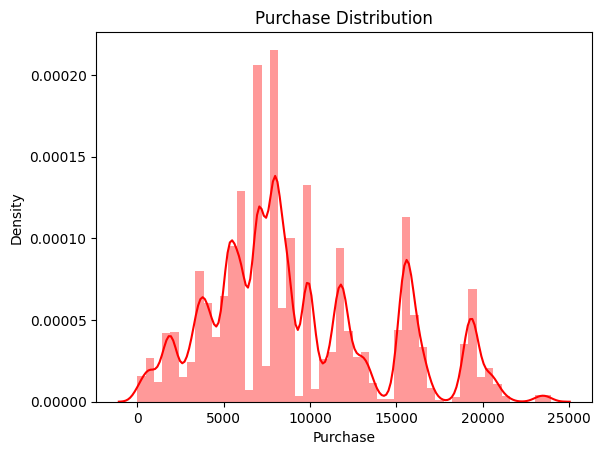

In [137]:
sns.distplot(df1["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

In [138]:
df1['Purchase'] = df1['Purchase'].fillna(df1['Purchase'].mean())

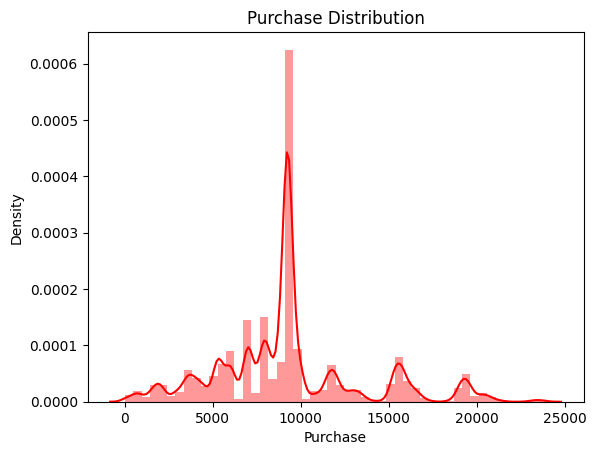

In [139]:
sns.distplot(df1["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

In [140]:
df1.head() # looking at the datset after filling the null value

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.0


### Rechecking the null values.

In [141]:
df1.isnull().sum() # all the null values have been removed

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Dropping the Column.

In [50]:
df.drop('City_Category',axis=1, inplace=True) 

In [51]:
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [72]:
df1.Stay_In_Current_City_Years.unique() # checking the unique values in the column Stay_In_Current_City_Years

array([2, 4, 3, 1, 0])

### Replacing the value by using str method.

In [53]:
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','') # replacing + with blank

In [75]:
df1.head() # checking the dataset after transformation

,index,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0
1,1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0
3,3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0
4,4,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.0


### Checking the allover info of the dataset.

In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    783667 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 65.8+ MB


### converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above

In [56]:
#df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
#df['B']=df['B'].astype(int)
#df['C']=df['C'].astype(int)

In [145]:
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.0
5,P00193542,1,3,15,A,3,0,1,2.0,16.0,15227.0
6,P00184942,1,5,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,5,7,B,2,1,1,15.0,16.0,15854.0
8,P0097242,1,5,7,B,2,1,1,16.0,16.0,15686.0
9,P00274942,1,3,20,A,1,1,8,8.0,16.0,7871.0


In [146]:
# Label Encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
 
df1['City_Category']= label_encoder.fit_transform(df1['City_Category']) 


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969.0


In [147]:
df1.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969.0
5,P00193542,1,3,15,0,3,0,1,2.0,16.0,15227.0
6,P00184942,1,5,7,1,2,1,1,8.0,17.0,19215.0
7,P00346142,1,5,7,1,2,1,1,15.0,16.0,15854.0
8,P0097242,1,5,7,1,2,1,1,16.0,16.0,15686.0
9,P00274942,1,3,20,0,1,1,8,8.0,16.0,7871.0


### Rechecking the datatypes of the dataset.

In [148]:
df1.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  int64  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    783667 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 71.7+ MB


In [149]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969.0


### Creating a checkpoint.

In [151]:
df1.loc[:,~df1.columns.isin(['Product_ID'])].corr()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.004758,0.116505,-0.003727,0.015026,-0.010945,-0.046208,-0.011851,-0.006651,0.050544
Age,-0.004758,1.000000,0.090882,0.123415,-0.004968,0.310747,0.060336,0.041716,0.036721,0.013278
Occupation,0.116505,0.090882,1.000000,0.035336,0.028488,0.023563,-0.008441,0.001501,-0.001576,0.017455
City_Category,-0.003727,0.123415,0.035336,1.000000,0.020564,0.040060,-0.018189,-0.003102,-0.022416,0.051895
Stay_In_Current_City_Years,0.015026,-0.004968,0.028488,0.020564,1.000000,-0.012871,-0.003518,-0.000081,-0.000308,0.004545
Marital_Status,-0.010945,0.310747,0.023563,0.040060,-0.012871,1.000000,0.019579,0.012192,0.013808,-0.000388
Product_Category_1,-0.046208,0.060336,-0.008441,-0.018189,-0.003518,0.019579,1.000000,0.286502,0.319209,-0.292266
Product_Category_2,-0.011851,0.041716,0.001501,-0.003102,-0.000081,0.012192,0.286502,1.000000,0.463528,-0.107600
Product_Category_3,-0.006651,0.036721,-0.001576,-0.022416,-0.000308,0.013808,0.319209,0.463528,1.000000,-0.155731
Purchase,0.050544,0.013278,0.017455,0.051895,0.004545,-0.000388,-0.292266,-0.107600,-0.155731,1.000000


<AxesSubplot:>

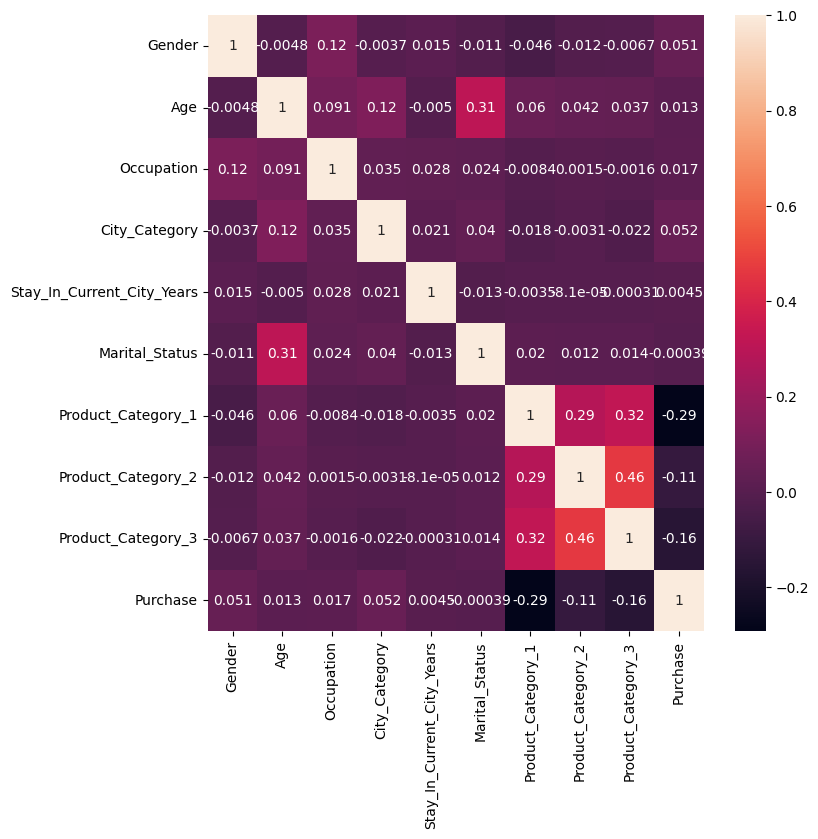

In [153]:
plt.figure(figsize = (8,8))
sns.heatmap(
    df1.loc[:,~df1.columns.isin(['Product_ID'])].corr(),
   annot = True
)

In [59]:
df_i = df.copy()

# Dropping the unnecessary field.
df_i.drop('Product_ID',axis=1,inplace=True)

In [60]:
df_i.head(10)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
5,1,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,1,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,1,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,1,3,20,1,1,8,8.0,16.0,7871.0,0,0


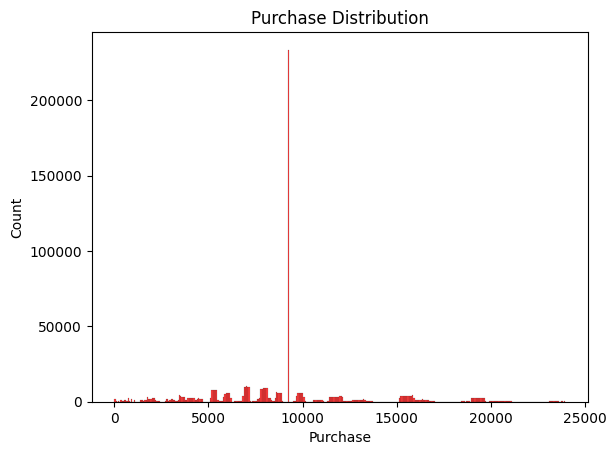

In [155]:
sns.histplot(df1["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

### Visualizing Age Vs Purchased.

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

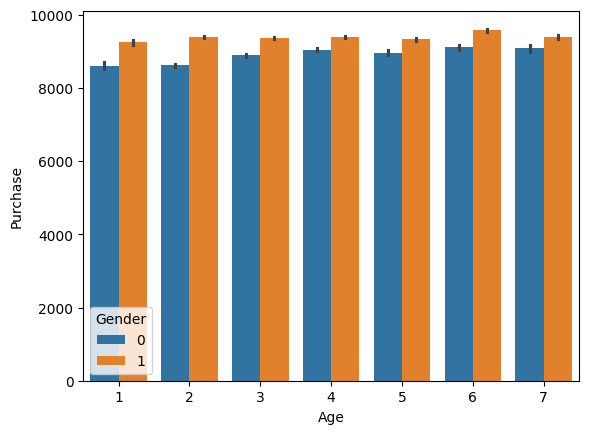

In [157]:
sns.barplot(x = 'Age',y = 'Purchase',hue='Gender',
            data=df1,
           legend = )

Purchasing of goods of each range of age are almost equal.
We can conclude that the percentage of purchasing goods of men over women is higher.

In [158]:
df.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

KeyboardInterrupt: 

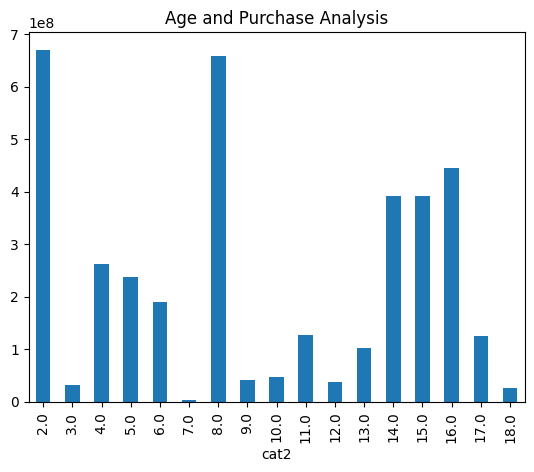

In [84]:
df.groupby("cat2").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

### Visualizing Occupation Vs Purchased.

In [159]:
df1.pivot_table(index='Occupation', 
                values='Purchase', 
                aggfunc=np.mean)

,Purchase
Occupation,
0,9165.665271
1,9046.218832
2,9046.003213
3,9203.995785
4,9228.905119
5,9312.458437
6,9258.769787
7,9377.669726
8,9453.686561


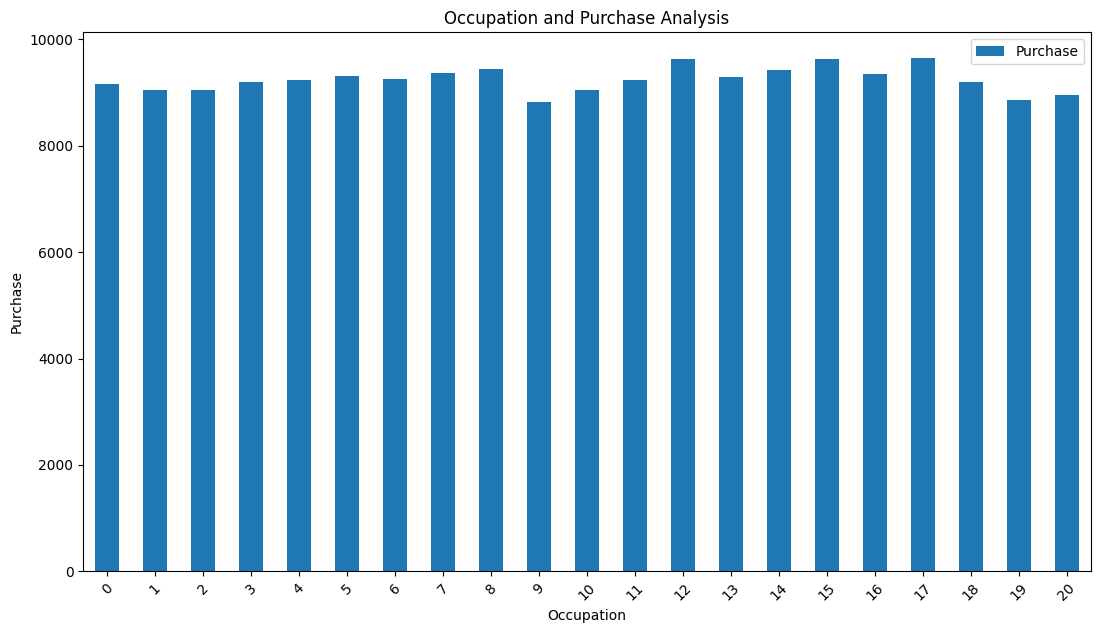

In [160]:
# bivariate analysis
occupation_plot = df1.pivot_table(index='Occupation', 
                                  values='Purchase', 
                                  aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

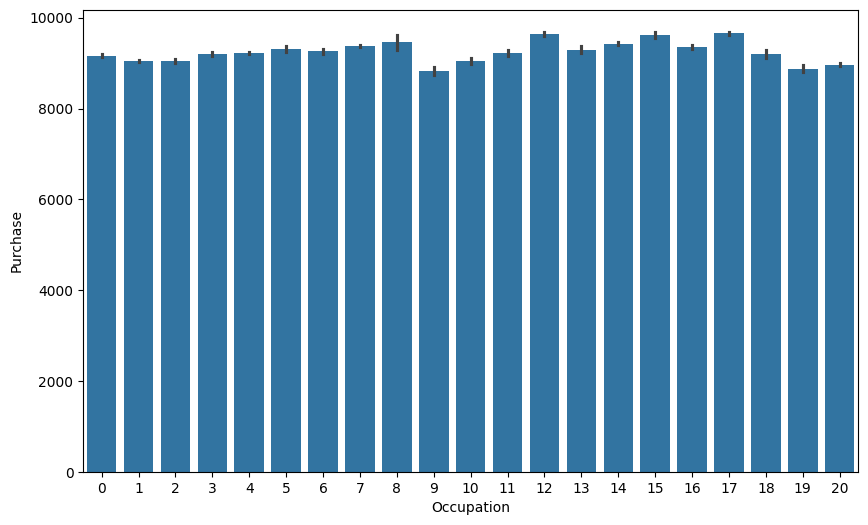

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation',y='Purchase', data = df1)

All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city.

### Visualizing Product_category1 Vs Purchased.

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

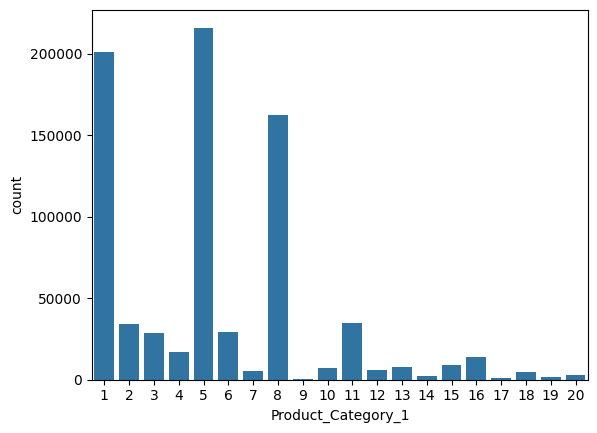

In [161]:
sns.countplot(x = df1['Product_Category_1'], data = df1)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

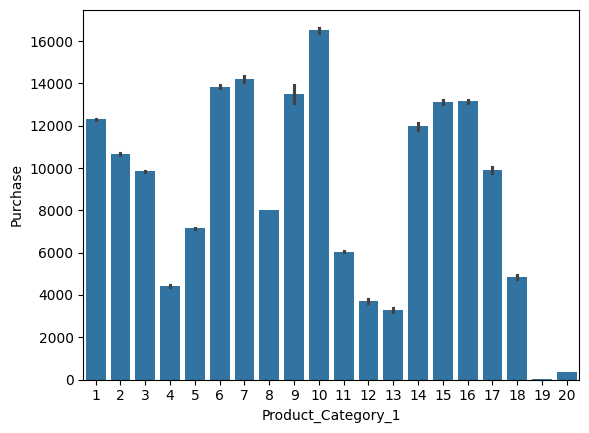

In [163]:
sns.barplot(x = df1['Product_Category_1'], y = df1['Purchase'])

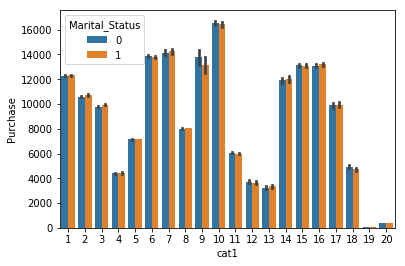

In [63]:
sns.barplot('cat1','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category2 Vs Purchased.

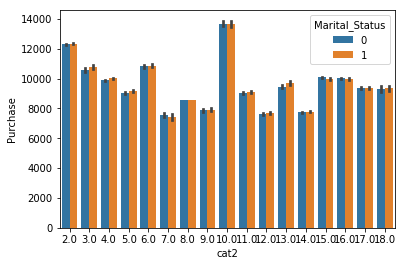

In [64]:
sns.barplot('cat2','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category3 Vs Purchased.

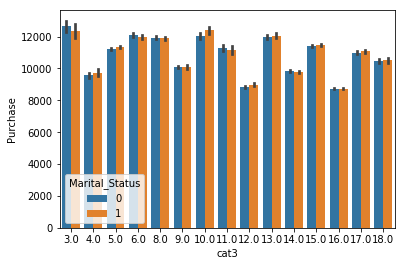

In [65]:
sns.barplot('cat3','Purchase',hue='Marital_Status',data=df_i)

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not.
product category3 is much more purchased by people than product category2 and product category1 

In [164]:
X = df1.drop('Purchase',axis=1) # dropping the Purchase column to create features
y = df1.Purchase  # selecting the Purchase column to create labels
print(X.shape)
print(y.shape)

(783667, 10)
(783667,)


In [166]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [67]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(587750, 10)
(587750,)
(195917, 10)
(195917,)


In [68]:
# Feature Scaling So that data in all the columns are to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\virat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\virat\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\virat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [69]:
X_train

array([[ 0.57275431, -0.36745197,  0.6008837 , ...,  0.36937114,
         1.17365495, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431,  1.10995723, -0.16579251, ...,  0.36937114,
         1.17365495, -0.67228678],
       ...,
       [ 0.57275431,  1.84866184,  1.67423038, ...,  0.36937114,
        -0.85203918,  1.48746045],
       [ 0.57275431, -1.10615657, -0.93246871, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ...,  0.36937114,
        -0.85203918,  1.48746045]])

In [70]:
X_test

array([[ 0.57275431, -0.36745197, -0.62579823, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [-1.74594931, -1.10615657, -0.62579823, ...,  0.36937114,
         1.17365495, -0.67228678],
       [ 0.57275431, -1.10615657, -0.62579823, ...,  0.36937114,
        -0.85203918, -0.67228678],
       ...,
       [ 0.57275431, -1.10615657,  0.90755418, ..., -3.64065155,
         1.17365495, -0.67228678],
       [ 0.57275431, -1.10615657,  0.29421322, ...,  0.36937114,
        -0.85203918,  1.48746045],
       [-1.74594931,  1.10995723,  0.6008837 , ...,  0.36937114,
        -0.85203918,  1.48746045]])

Now we have features for both training and testing. The data can now be converted to a dataframe, if necessary, and can be fed to a machine learning model. 

In [97]:
df

,index,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.000000
1,1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.000000
2,2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.000000
3,3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.000000
4,4,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,233594,P00118942,0,3,15,B,4,1,8,8.0,16.0,9263.968713
783663,233595,P00254642,0,3,15,B,4,1,5,8.0,16.0,9263.968713
783664,233596,P00031842,0,3,15,B,4,1,1,5.0,12.0,9263.968713
783665,233597,P00124742,0,5,1,C,4,0,10,16.0,16.0,9263.968713
